Sowutuom Clinic Dataset

In [2]:
##     importing libraries
import pandas as pd
import numpy as np

Loading the Dataset

In [3]:
##      Loading dataset from google drive
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dataset/Sowutuom Clinic Dataset/sowutuom_clinic_dataset.csv")

Describing the dataset for better understanding of the data

In [4]:
##      Explanation of all the columns

column_details = {
    "clinic": "The clinic branch where each patient's data was recorded.",
    "age": "The age of the patient in years.",
    "height": "Patient height measured in centimeters.",
    "weight": "Patient weight measured in kilograms.",
    "bmi": "Body Mass Index calculated from height and weight.",
    "glucose_level": "The patient's blood sugar level measured in mg/dL.",
    "blood_group": "The blood type of the patient (O+, A-, AB+, etc.).",
    "genotype": "The genetic type of the patient (AA, AS, SS, AC).",
    "diabetic": "Shows if the patient is diabetic (1 = diabetic, 0 = not diabetic)."
}

column_details

{'clinic': "The clinic branch where each patient's data was recorded.",
 'age': 'The age of the patient in years.',
 'height': 'Patient height measured in centimeters.',
 'weight': 'Patient weight measured in kilograms.',
 'bmi': 'Body Mass Index calculated from height and weight.',
 'glucose_level': "The patient's blood sugar level measured in mg/dL.",
 'blood_group': 'The blood type of the patient (O+, A-, AB+, etc.).',
 'genotype': 'The genetic type of the patient (AA, AS, SS, AC).',
 'diabetic': 'Shows if the patient is diabetic (1 = diabetic, 0 = not diabetic).'}

In [5]:
##      Taking a look at the first 5 rows of the dataset
df.head()

,clinic,age,height,weight,bmi,glucose_level,blood_group,genotype,diabetic
0,clinic_1,18,168.9,91.3,31.7,116,O+,AA,0
1,clinic_1,60,170.8,87.9,29.8,76,B+,AA,0
2,clinic_1,55,182.2,77.9,23.2,102,O+,AA,0
3,clinic_1,21,177.0,69.4,22.3,92,O+,AS,0
4,clinic_1,75,164.6,51.4,19.2,105,O-,AA,0


Exploratory dataset analysis

In [6]:
# checking the shape of the dataset
df.shape

(500, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   clinic         500 non-null    object 
 1   age            500 non-null    int64  
 2   height         500 non-null    float64
 3   weight         500 non-null    float64
 4   bmi            500 non-null    float64
 5   glucose_level  500 non-null    int64  
 6   blood_group    500 non-null    object 
 7   genotype       500 non-null    object 
 8   diabetic       500 non-null    int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 35.3+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
clinic,500,5,clinic_1,100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,500.0,NaN,NaN,NaN,47.828,17.895668,18.0,33.0,47.0,64.0,80.0
height,500.0,NaN,NaN,NaN,169.7864,8.323625,145.0,164.3,169.95,175.9,194.5
weight,500.0,NaN,NaN,NaN,72.8604,15.158369,45.0,62.675,72.1,81.9,125.9
bmi,500.0,NaN,NaN,NaN,25.2124,4.778262,16.0,21.9,25.15,28.7,37.9
glucose_level,500.0,NaN,NaN,NaN,94.878,18.040122,60.0,83.0,94.0,107.25,143.0
blood_group,500,7,O+,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
genotype,500,3,AA,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diabetic,500.0,NaN,NaN,NaN,0.14,0.347335,0.0,0.0,0.0,0.0,1.0


Check Missing Values

In [9]:
##      checking if some data are missing from the dataset
df.isnull()

,clinic,age,height,weight,bmi,glucose_level,blood_group,genotype,diabetic
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
495,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False
498,False,False,False,False,False,False,False,False,False


In [10]:
##      giving the sum of null values
df.isnull().sum()

,0
clinic,0
age,0
height,0
weight,0
bmi,0
glucose_level,0
blood_group,0
genotype,0
diabetic,0


Remove Duplicate Rows

In [11]:
df = df.drop_duplicates()

In [12]:
df.head()

,clinic,age,height,weight,bmi,glucose_level,blood_group,genotype,diabetic
0,clinic_1,18,168.9,91.3,31.7,116,O+,AA,0
1,clinic_1,60,170.8,87.9,29.8,76,B+,AA,0
2,clinic_1,55,182.2,77.9,23.2,102,O+,AA,0
3,clinic_1,21,177.0,69.4,22.3,92,O+,AS,0
4,clinic_1,75,164.6,51.4,19.2,105,O-,AA,0


Check Data Types

In [13]:
df.dtypes

,0
clinic,object
age,int64
height,float64
weight,float64
bmi,float64
glucose_level,int64
blood_group,object
genotype,object
diabetic,int64


Visualizing Distributions of Numeric Columns

In [14]:
import matplotlib.pyplot as plt

In [15]:
numeric_cols = ["age", "height", "weight", "bmi", "glucose_level"]

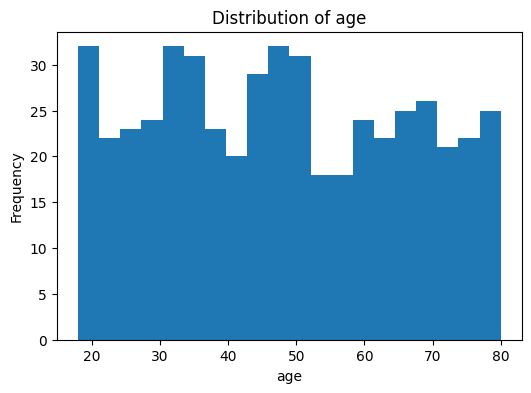

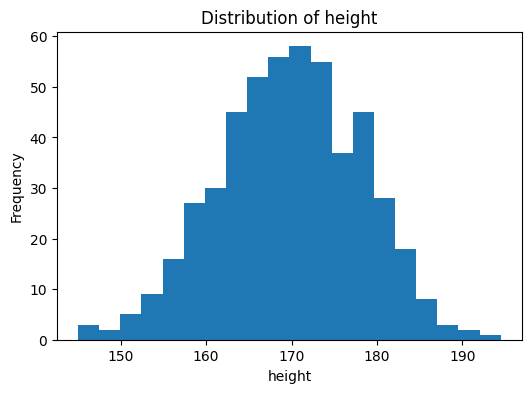

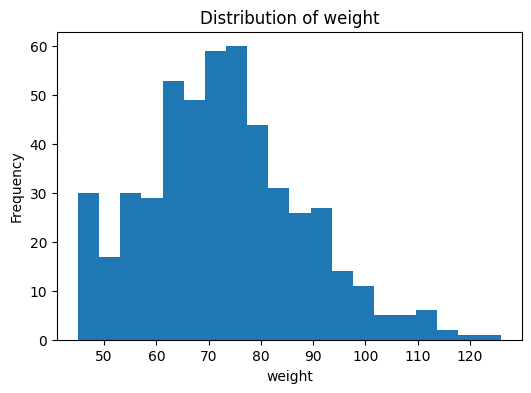

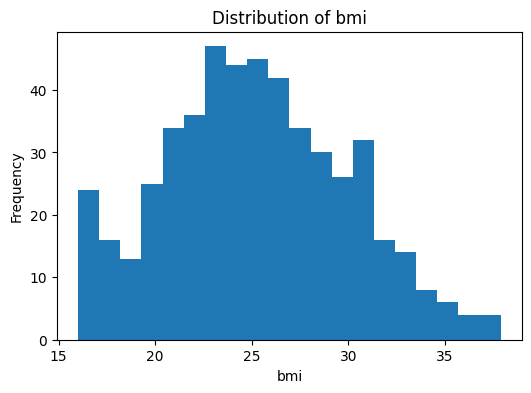

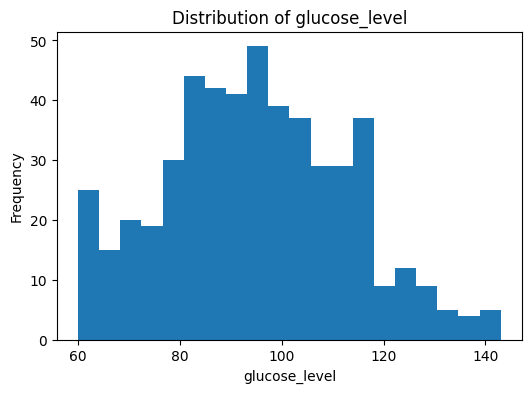

In [16]:
##      Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col], bins=20)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

Count Plots for Categorical Columns

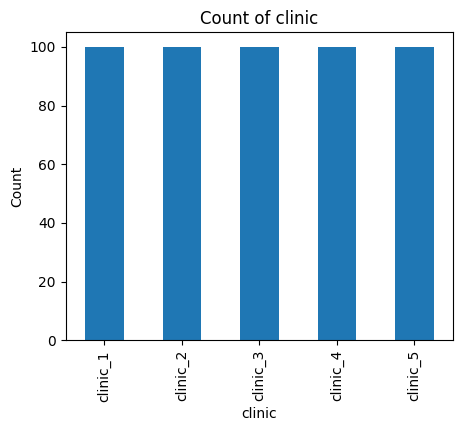

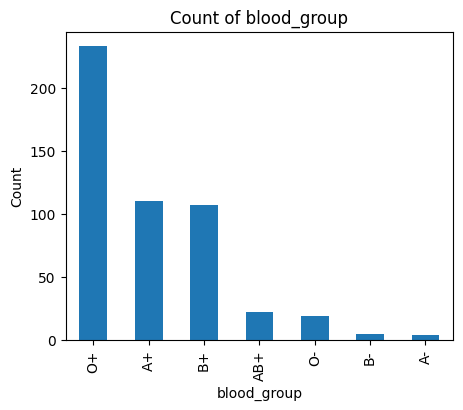

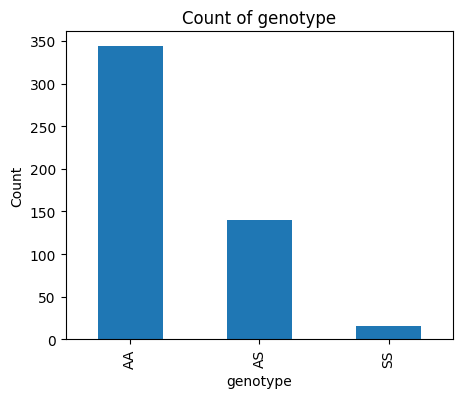

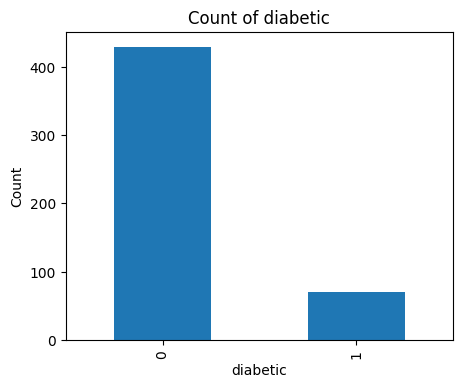

In [17]:
categorical_cols = ["clinic", "blood_group", "genotype", "diabetic"]

for col in categorical_cols:
    plt.figure(figsize=(5,4))
    df[col].value_counts().plot(kind="bar")
    plt.title(f"Count of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


Correlation Heatmap (for numeric features)

In [18]:
import seaborn as sns

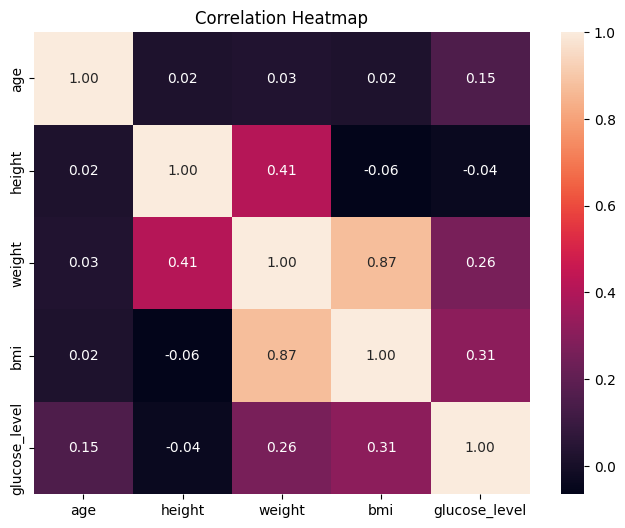

In [19]:
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Relationship Between Glucose Level and Diabetes

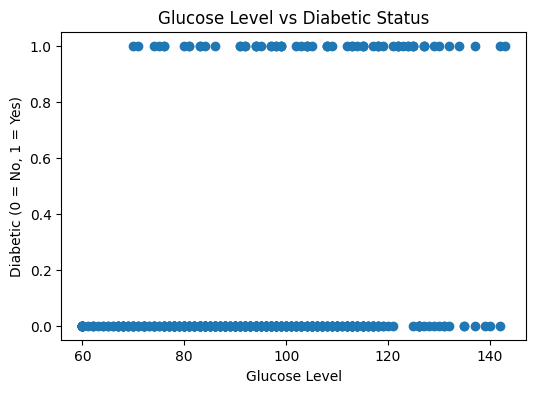

In [20]:
plt.figure(figsize=(6,4))
plt.scatter(df["glucose_level"], df["diabetic"])
plt.title("Glucose Level vs Diabetic Status")
plt.xlabel("Glucose Level")
plt.ylabel("Diabetic (0 = No, 1 = Yes)")
plt.show()


Average BMI by Diabetes Status

In [21]:
df.groupby("diabetic")["bmi"].mean()

,bmi
diabetic,
0,24.480000
1,29.711429


Simple Boxplots for Each Numeric Column

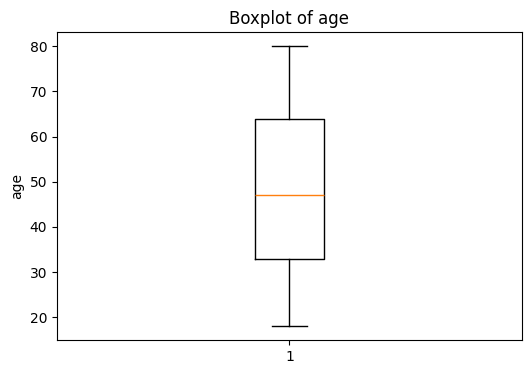

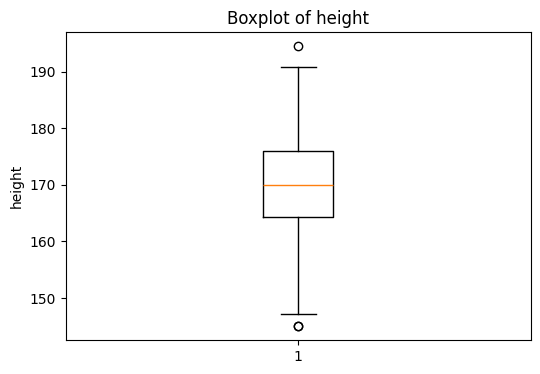

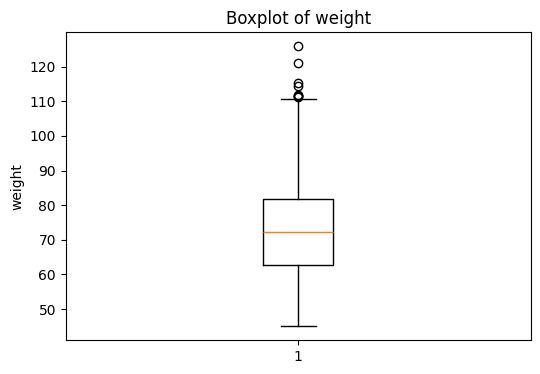

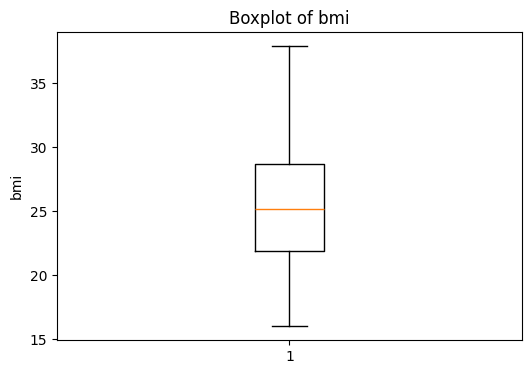

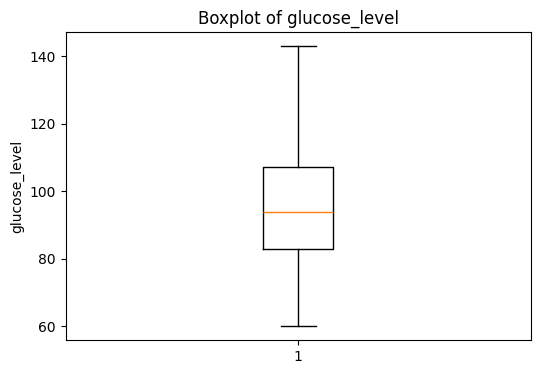

In [22]:
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()


Optional: Remove Extreme Outliers (using IQR)

In [23]:
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] >= lower) & (data[column] <= upper)]

for col in numeric_cols:
    df = remove_outliers(df, col)

In [24]:
df = df.reset_index(drop=True)

Pairplot (Shows relationships between numeric variables)

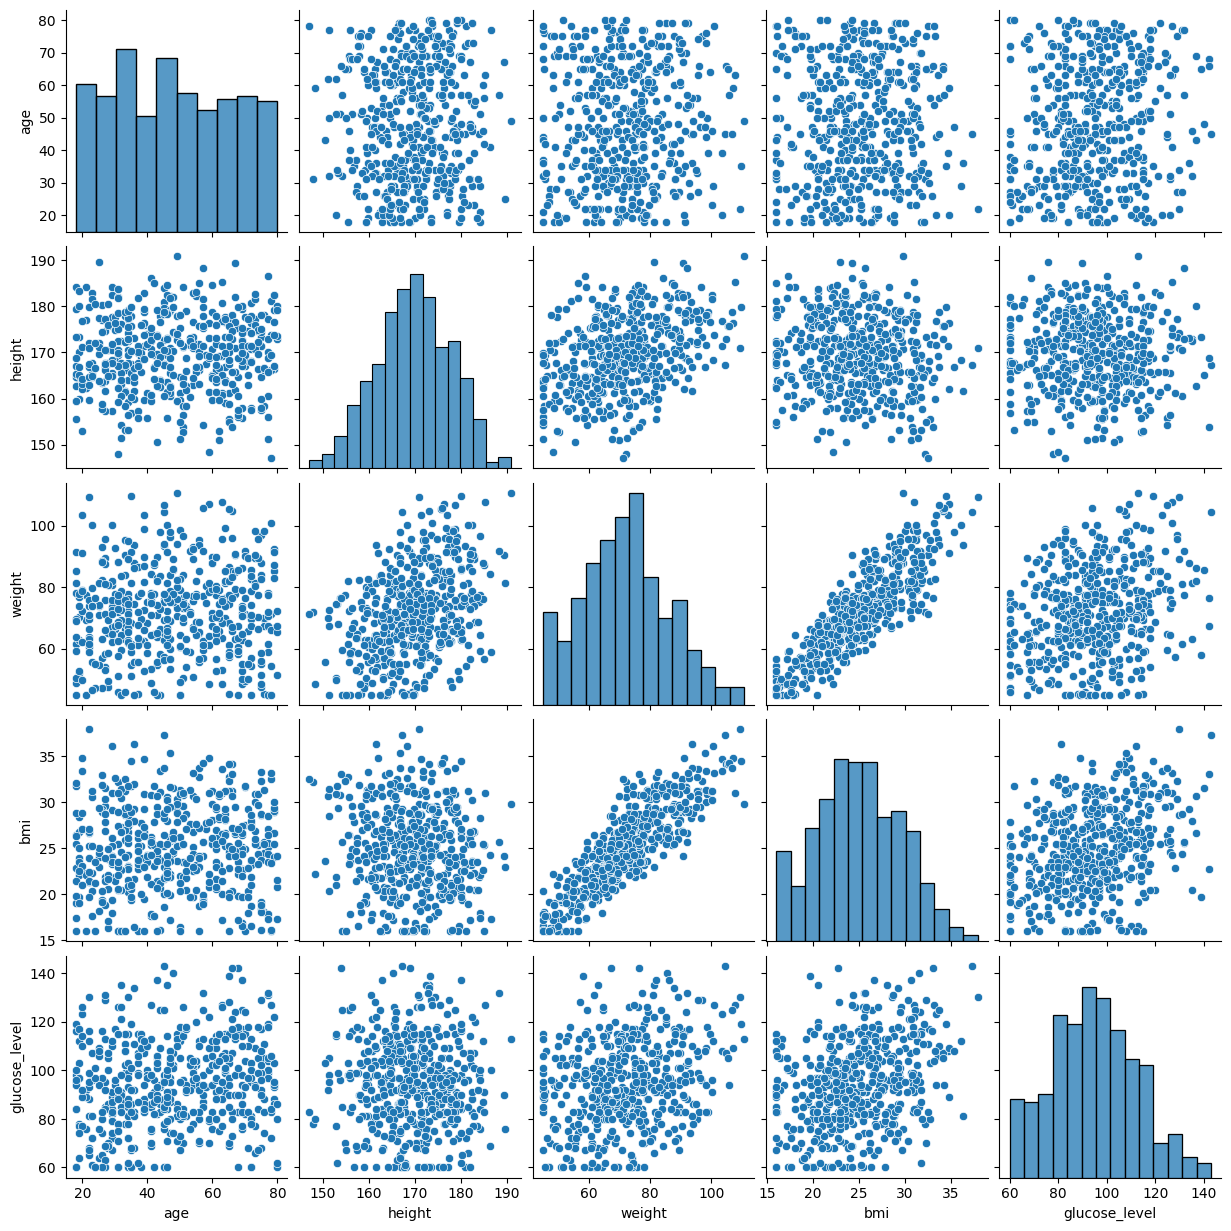

In [25]:
sns.pairplot(df[numeric_cols])
plt.show()

Dataset Splitting + Model Buildin

In [26]:
##      Encode Categorical Columns First
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
label_cols = ["clinic", "blood_group", "genotype"]

encoder = LabelEncoder()

for col in label_cols:
    df_encoded[col] = encoder.fit_transform(df_encoded[col])


In [27]:
##      Define Features (X) and Target (y)
X = df_encoded.drop("diabetic", axis=1)
y = df_encoded["diabetic"]

In [28]:
##      Split Into Train (80%), Validation (10%), Test (10%)
from sklearn.model_selection import train_test_split

# Step 1: split into 80% train + 20% temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

# Step 2: split temp into 10% val + 10% test (50% of temp each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

len(X_train), len(X_val), len(X_test)


(391, 49, 49)

Train Model A — Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

log_val_pred = log_model.predict(X_val)
log_test_pred = log_model.predict(X_test)

log_val_acc = accuracy_score(y_val, log_val_pred)
log_test_acc = accuracy_score(y_test, log_test_pred)

print("Logistic Regression Validation Accuracy:", log_val_acc)
print("Logistic Regression Test Accuracy:", log_test_acc)

print("\nConfusion Matrix (Validation):\n", confusion_matrix(y_val, log_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, log_val_pred))


Logistic Regression Validation Accuracy: 0.8979591836734694
Logistic Regression Test Accuracy: 0.8571428571428571

Confusion Matrix (Validation):
 [[43  0]
 [ 5  1]]

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.17      0.29         6

    accuracy                           0.90        49
   macro avg       0.95      0.58      0.62        49
weighted avg       0.91      0.90      0.86        49



Train Model B — Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_model = RandomForestClassifier(random_state=42)
forest_model.fit(X_train, y_train)

forest_val_pred = forest_model.predict(X_val)
forest_test_pred = forest_model.predict(X_test)

forest_val_acc = accuracy_score(y_val, forest_val_pred)
forest_test_acc = accuracy_score(y_test, forest_test_pred)

print("Random Forest Validation Accuracy:", forest_val_acc)
print("Random Forest Test Accuracy:", forest_test_acc)

print("\nConfusion Matrix (Validation):\n", confusion_matrix(y_val, forest_val_pred))
print("\nClassification Report (Validation):\n", classification_report(y_val, forest_val_pred))


Random Forest Validation Accuracy: 0.8775510204081632
Random Forest Test Accuracy: 0.8979591836734694

Confusion Matrix (Validation):
 [[43  0]
 [ 6  0]]

Classification Report (Validation):
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       0.00      0.00      0.00         6

    accuracy                           0.88        49
   macro avg       0.44      0.50      0.47        49
weighted avg       0.77      0.88      0.82        49



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Evaluate on Validation Set

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

y_val_pred = forest_model.predict(X_val)
y_val_proba = forest_model.predict_proba(X_val)[:, 1]

val_accuracy = accuracy_score(y_val, y_val_pred)
val_precision = precision_score(y_val, y_val_pred)
val_recall = recall_score(y_val, y_val_pred)
val_f1 = f1_score(y_val, y_val_pred)
val_auc = roc_auc_score(y_val, y_val_proba)

print("Validation Metrics")
print("------------------")
print("Accuracy :", val_accuracy)
print("Precision:", val_precision)
print("Recall   :", val_recall)
print("F1-score :", val_f1)
print("ROC-AUC  :", val_auc)

print("\nClassification Report (Validation):")
print(classification_report(y_val, y_val_pred))

Validation Metrics
------------------
Accuracy : 0.8775510204081632
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.7984496124031008

Classification Report (Validation):
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        43
           1       0.00      0.00      0.00         6

    accuracy                           0.88        49
   macro avg       0.44      0.50      0.47        49
weighted avg       0.77      0.88      0.82        49



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

Confusion Matrix (Validation)

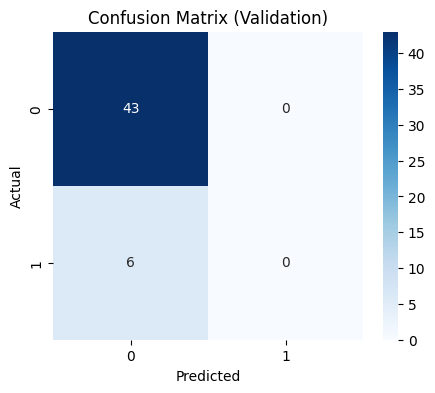

In [34]:
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Validation)")
plt.show()

ROC Curve (Validation)

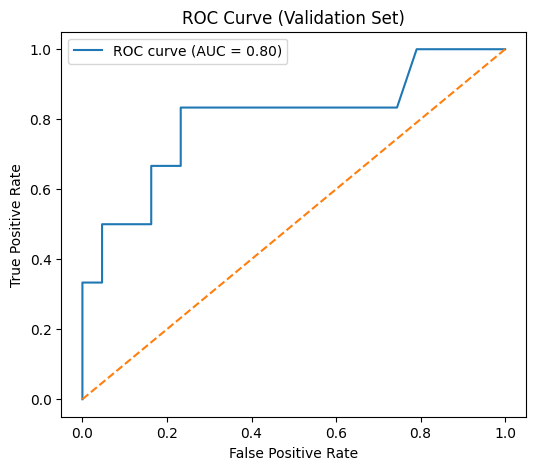

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {val_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation Set)')
plt.legend()
plt.show()

Final Evaluation on Test Set

In [38]:
y_test_pred = forest_model.predict(X_test)
y_test_proba = forest_model.predict_proba(X_test)[:, 1]

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)
test_f1 = f1_score(y_test, y_test_pred)
test_auc = roc_auc_score(y_test, y_test_proba)

print("Test Metrics")
print("------------")
print("Accuracy :", test_accuracy)
print("Precision:", test_precision)
print("Recall   :", test_recall)
print("F1-score :", test_f1)
print("ROC-AUC  :", test_auc)

print("\nClassification Report (Test):")
print(classification_report(y_test, y_test_pred))

Test Metrics
------------
Accuracy : 0.8979591836734694
Precision: 1.0
Recall   : 0.16666666666666666
F1-score : 0.2857142857142857
ROC-AUC  : 0.7810077519379846

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        43
           1       1.00      0.17      0.29         6

    accuracy                           0.90        49
   macro avg       0.95      0.58      0.62        49
weighted avg       0.91      0.90      0.86        49



Compare the Two Models

In [39]:
print("=============== MODEL COMPARISON ===============\n")

print(f"Logistic Regression ---- Validation Accuracy: {log_val_acc:.3f}")
print(f"Random Forest       ---- Validation Accuracy: {forest_val_acc:.3f}")

print("\nFinal Test Accuracies:")
print(f"Logistic Regression: {log_test_acc:.3f}")
print(f"Random Forest     : {forest_test_acc:.3f}")

best_model = "Random Forest" if forest_val_acc > log_val_acc else "Logistic Regression"

print(f"\nBEST MODEL BASED ON VALIDATION PERFORMANCE: {best_model}")


=============== MODEL COMPARISON ===============

Logistic Regression ---- Validation Accuracy: 0.898
Random Forest       ---- Validation Accuracy: 0.878

Final Test Accuracies:
Logistic Regression: 0.857
Random Forest     : 0.898

BEST MODEL BASED ON VALIDATION PERFORMANCE: Logistic Regression


Helper – Convert Probability to Risk Level

In [40]:
def get_risk_level(prob):
    """
    Convert diabetes probability (0 to 1) into a risk category.
    """
    if prob >= 0.8:
        return "Very High"
    elif prob >= 0.6:
        return "High"
    elif prob >= 0.4:
        return "Moderate"
    else:
        return "Low"

Helper – Generate Lifestyle Recommendations

In [41]:
def lifestyle_recommendations(row):
    """
    row: a pandas Series representing a single patient.
    Uses BMI, glucose_level, age, etc. to give simple advice.
    """
    recs = []

    # ----- BMI -----
    if row['bmi'] >= 30:
        recs.append(
            "Your BMI is in the obese range. "
            "Please consider a supervised weight-loss plan with diet and regular exercise."
        )
    elif row['bmi'] >= 25:
        recs.append(
            "You are overweight. Increasing physical activity and improving your diet "
            "can help reduce your weight slightly."
        )
    else:
        recs.append(
            "Your BMI is in a healthy range. Maintain your current lifestyle and stay active."
        )

    # ----- Glucose -----
    if row['glucose_level'] >= 126:
        recs.append(
            "Your fasting glucose level is high. Please see a clinician for further testing "
            "and proper medical advice."
        )
    elif 100 <= row['glucose_level'] < 126:
        recs.append(
            "Your glucose level is in the borderline range (pre-diabetic). "
            "Lifestyle changes and regular check-ups are strongly recommended."
        )
    else:
        recs.append(
            "Your glucose level is within the normal range. Continue to check it regularly."
        )

    # ----- Age -----
    if row['age'] >= 45:
        recs.append(
            "Because of your age, schedule regular screenings for diabetes and other "
            "chronic conditions."
        )
    else:
        recs.append(
            "You are relatively young, but early healthy habits (diet, exercise) are still important."
        )

    # You can also use blood_group or genotype if needed, but usually
    # BMI, glucose, age, etc. drive the recommendations.

    return recs

Full Patient Report (Risk + Recommendations)

In [42]:
def generate_patient_report(trained_model, patient_row):
    """
    trained_model: our fitted pipeline `model`
    patient_row: a pandas Series with the same columns as X (no target column)
    """
    # Convert to DataFrame (model expects 2D)
    patient_df = patient_row.to_frame().T

    # Predict diabetes probability
    prob = trained_model.predict_proba(patient_df)[0][1]
    risk_level = get_risk_level(prob)

    # Generate rule-based lifestyle recommendations
    recs = lifestyle_recommendations(patient_row)

    report = {
        "risk_probability": float(round(prob, 3)),
        "risk_level": risk_level,
        "recommendations": recs
    }
    return report

Use the Report for One Patient

In [44]:
example_index = X_test.index[0]
example_patient = X_test.loc[example_index]

patient_report = generate_patient_report(log_model, example_patient)

print("=== PATIENT DIABETES RISK REPORT ===")
print(f"Risk Probability: {patient_report['risk_probability']}")
print(f"Risk Level     : {patient_report['risk_level']}")
print("\nRecommended Actions:")
for i, r in enumerate(patient_report['recommendations'], start=1):
    print(f"{i}. {r}")

=== PATIENT DIABETES RISK REPORT ===
Risk Probability: 0.066
Risk Level     : Low

Recommended Actions:
1. You are overweight. Increasing physical activity and improving your diet can help reduce your weight slightly.
2. Your glucose level is within the normal range. Continue to check it regularly.
3. Because of your age, schedule regular screenings for diabetes and other chronic conditions.


 Function – Get Report by Row Index from Original df

In [46]:
def get_report_by_index(idx):
    """
    Convenience function: give an index from the original df
    and get the risk + recommendations.
    """
    target_col = 'diabetic'
    # Make sure we use the same feature columns as X
    patient_row = df_encoded.drop(columns=[target_col]).loc[idx]
    return generate_patient_report(log_model, patient_row)

# Example:
example_idx = X_test.index[0]  # change this index to test other patients
report = get_report_by_index(example_idx)

print(f"=== PATIENT #{example_idx} RISK REPORT ===")
print(f"Risk Probability: {report['risk_probability']}")
print(f"Risk Level     : {report['risk_level']}")
print("\nRecommended Actions:")
for i, r in enumerate(report['recommendations'], start=1):
    print(f"{i}. {r}")

=== PATIENT #46 RISK REPORT ===
Risk Probability: 0.066
Risk Level     : Low

Recommended Actions:
1. You are overweight. Increasing physical activity and improving your diet can help reduce your weight slightly.
2. Your glucose level is within the normal range. Continue to check it regularly.
3. Because of your age, schedule regular screenings for diabetes and other chronic conditions.
